In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt
type(plt)

module

In [8]:
import seaborn as sns
sns.set_context('notebook')
sns.set_style('darkgrid')
from thunder import ThunderContext, KMeans, Colorize
image = Colorize.image

In [9]:
type(tsc)

instance

In [10]:
#rawdata=tsc.loadImages('file:///Users/tarunjoshi/softwares/101_ObjectCategories/Faces/',dims='none',inputFormat='png')
#rawdata = tsc.loadExample('fish-series')
rawdata = tsc.loadSeries('file:///Users/tarunjoshi/softwares/spark-1.4.1-bin-hadoop2.6/apps/my-binary-directory/key02_00000-key01_00000-key00_00000.bin').cache()
type(rawdata)

thunder.rdds.series.Series

In [11]:
data=rawdata.toTimeSeries().normalize()
data.dims;

In [12]:
from thunder import PCA
model = PCA(k=2).fit(data)


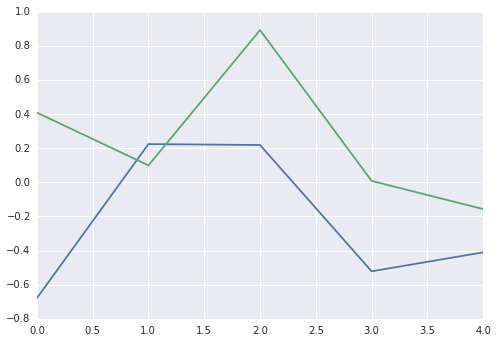

In [13]:
plt.plot(model.comps.T);

In [14]:
imgs = model.scores.pack()
imgs.shape # dimensions should be (k, x, y, z) where k is the number of components

(2, 337, 510, 3)

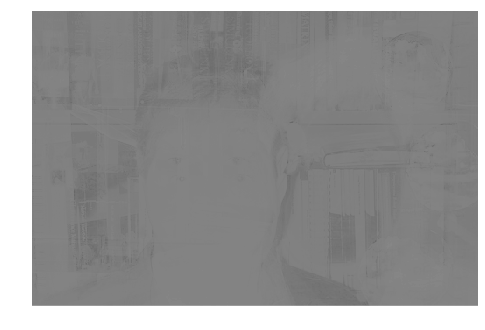

In [15]:
image(imgs[0,:,:,0], clim=(-0.05,0.05))

In [16]:
maps = Colorize(cmap='polar', scale=4).transform(imgs)


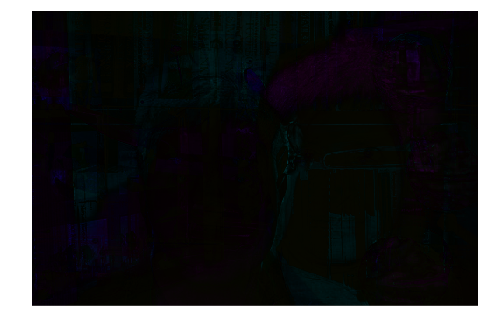

In [17]:
from numpy import amax
image(amax(maps,2))

In [18]:
pts = model.scores.subset(500, thresh=0.0005, stat='norm')

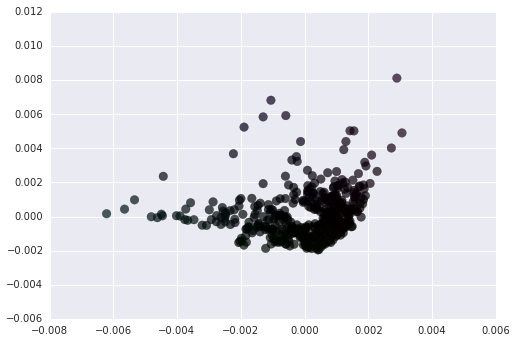

In [19]:
from numpy import newaxis, squeeze
clrs = Colorize(cmap='polar', scale=4).transform([pts[:,0][:,newaxis], pts[:,1][:,newaxis]]).squeeze()
plt.scatter(pts[:,0],pts[:,1], c=clrs, s=75, alpha=0.7);